<a href="https://colab.research.google.com/github/mekhiya/pytorch-playground/blob/main/003_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
!nvidia-smi

Mon Dec  4 14:14:18 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    32W /  70W |   1189MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)
# TODO: Setup device agnostic code


2.1.0+cu118


## 1. What are 3 areas in industry where computer vision is currently being used?

In [ ]:
# Auto, Agriculture, Manufacturing , Medicine

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [ ]:
# Loss curve kind of goes down, almost try to reach zero. If there is lot of area above loss curve, it is under fitting, if area below loss curve, it is
# over fitting

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [ ]:
"""
increase quality fo data, remove noise
reduce training epoch
reduce features
use linear if possible
"""

'\nincrease quality fo data, remove noise\nreduce training epoch\nreduce features\nuse linear if possible\n'

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [ ]:
# done

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [ ]:
import torch
from torchvision import datasets
from torchvision import transforms

train_data = datasets.MNIST(root=".",
                            train=True,
                            download=True,
                            transform=transforms.ToTensor())

test_data = datasets.MNIST(root=".",
                            train=False,
                            download=True,
                            transform=transforms.ToTensor())

train_data, train_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: .
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 60000
     Root location: .
     Split: Train
     StandardTransform
 Transform: ToTensor())

In [ ]:
train_data, test_data, len(train_data), len(test_data)

(Dataset MNIST
     Number of datapoints: 60000
     Root location: .
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: .
     Split: Test
     StandardTransform
 Transform: ToTensor(),
 60000,
 10000)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [ ]:
class_names = test_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])


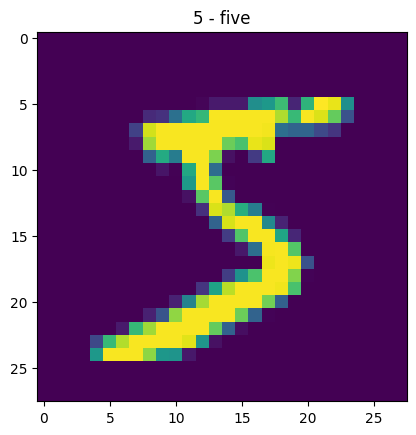

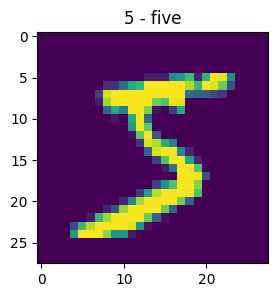

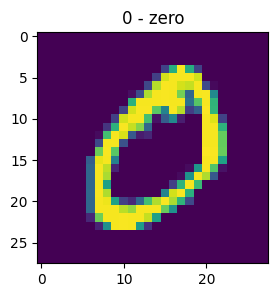

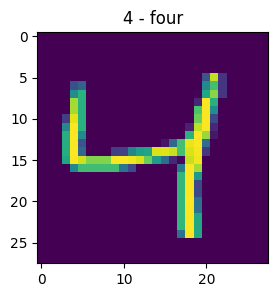

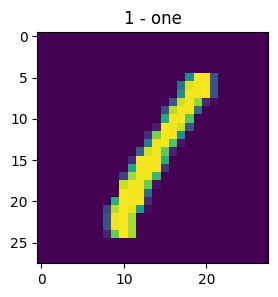

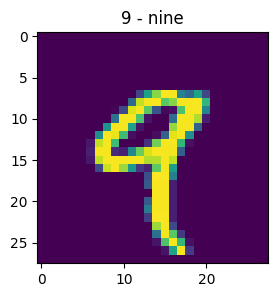

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(image.shape)
plt.imshow(image.squeeze())
plt.title(class_names[label])

for i in range(5):
  print(image.shape)
  img = train_data[i][0]
  label = train_data[i][1]
  plt.figure(figsize=(3,3))
  plt.imshow(img.squeeze())
  plt.title(class_names[label])

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [ ]:
from torch.utils.data.dataloader import DataLoader

train_dataloader = DataLoader(batch_size=32,
                              dataset=train_data,
                              shuffle=True)

test_dataloader = DataLoader(batch_size=32,
                              dataset=test_data,
                              shuffle=False)

len(train_dataloader), len(test_dataloader)


(1875, 313)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [ ]:
from torch import nn

class MNISTModelV2(nn.Module):
  def __init__(self, input_channels, output_channels, hidden_units):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
      nn.Conv2d(in_channels=input_channels,out_channels=hidden_units, kernel_size=3, padding=1, stride=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units, kernel_size=3, padding=1, stride=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units, kernel_size=3, padding=1, stride=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units, kernel_size=3, padding=1, stride=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, out_features=output_channels)
    )

  def forward(self, X):
    X = self.conv_block_1(X)
    # print(X.shape)
    X= self.conv_block_2(X)
    # print(X.shape)
    X = self.classifier(X)
    return X

In [ ]:
model_2 = MNISTModelV2(input_channels=1,
                       output_channels=len(class_names),
                       hidden_units=10)
model_2

MNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
torch.manual_seed(42)

train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
import torch.random
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
# test_image = img[0]
y = model_2(img.unsqueeze(dim=0))

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [ ]:
%%time
from tqdm.auto import tqdm


# train n cpu
model_cpu = MNISTModelV2(input_channels=1,
                         hidden_units=10,
                         output_channels=10).to("cuda")

# create a loss fn & optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_cpu.parameters(), lr=0.1)

epochs=5

for epoch in tqdm(range(epochs)):
  train_loss = 0
  model_cpu.train()
  for batch, (X, y) in enumerate(train_dataloader):
    model_cpu.train()

    X,y = X.to("cuda"), y.to("cuda")

    y_pred = model_cpu(X)

    loss = loss_fn(y_pred, y)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /= len(train_dataloader)

  test_loss_total = 0

  model_cpu.eval()

  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to("cuda"), y_test.to("cuda")

      test_pred = model_cpu(X_test)
      test_loss = loss_fn(test_pred, y_test)

      test_loss_total += test_loss

    test_loss_total /= len(test_dataloader)

  print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f}")




  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Loss: 0.000 | Test loss: 0.061
Epoch: 1 | Loss: 0.000 | Test loss: 0.051
Epoch: 2 | Loss: 0.000 | Test loss: 0.048
Epoch: 3 | Loss: 0.000 | Test loss: 0.045
Epoch: 4 | Loss: 0.000 | Test loss: 0.039
CPU times: user 1min 8s, sys: 673 ms, total: 1min 9s
Wall time: 1min 21s


In [ ]:
%%time
from tqdm.auto import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"

# Train on GPU
model_gpu = MNISTModelV2(input_channels=1,
                        hidden_units=10,
                        output_channels=10).to(device)

# Create a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_gpu.parameters(), lr=0.1)

# Training loop
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss = 0
  model_gpu.train()
  for batch, (X, y) in enumerate(train_dataloader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # Forward pass
    y_pred = model_gpu(X)

    # Loss calculation
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Step the optimizer
    optimizer.step()

  # Adjust train loss to number of batches
  train_loss /= len(train_dataloader)

  ### Testing loop
  test_loss_total = 0
  # Put model in eval mode and turn on inference mode
  model_gpu.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(test_dataloader):
      # Make sure test data on target device
      X_test, y_test = X_test.to(device), y_test.to(device)

      test_pred = model_gpu(X_test)
      test_loss = loss_fn(test_pred, y_test)

      test_loss_total += test_loss

    # Adjust test loss total for number of batches
    test_loss_total /= len(test_dataloader)

  # Print out what's happening
  print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Loss: 0.284 | Test loss: 0.076
Epoch: 1 | Loss: 0.070 | Test loss: 0.060
Epoch: 2 | Loss: 0.055 | Test loss: 0.048
Epoch: 3 | Loss: 0.047 | Test loss: 0.045
Epoch: 4 | Loss: 0.041 | Test loss: 0.045
CPU times: user 1min 3s, sys: 666 ms, total: 1min 4s
Wall time: 1min 7s


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

torch.Size([1, 28, 28])


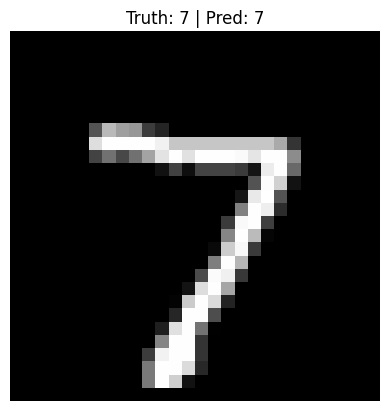

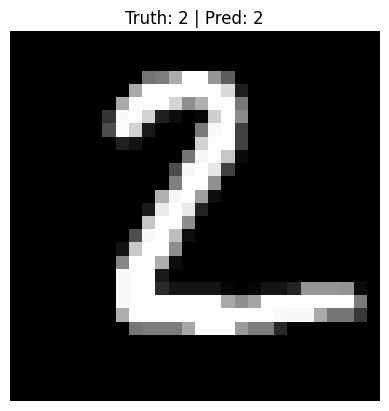

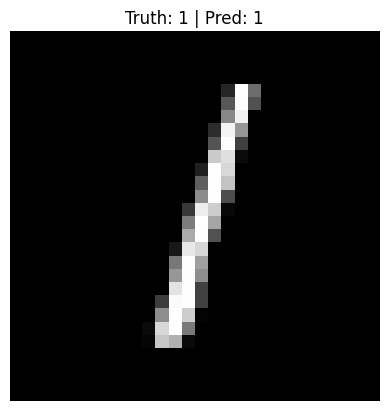

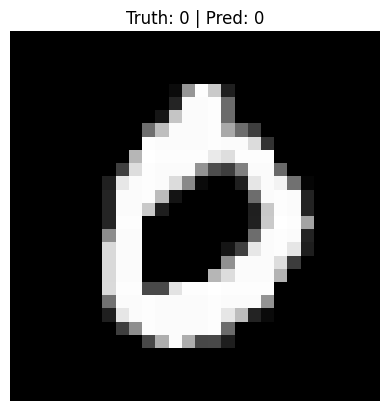

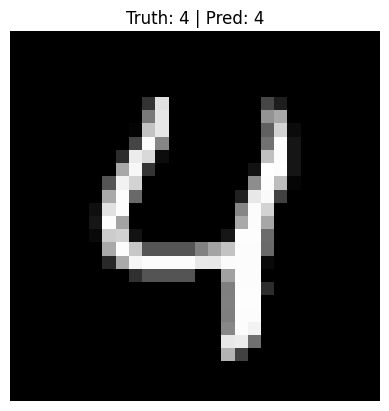

In [ ]:
# plt.imshow(test_data[0][0].squeeze())
device = "cuda" if torch.cuda.is_available() else "cpu"
print(test_data[0][0].shape)
y_logits = model_cpu(test_data[0][0].unsqueeze(dim=0).to(device)).to(device)
y_prob_pred = torch.softmax(y_logits,dim=1)
y_pred = torch.argmax(y_prob_pred)
y_pred


num_to_plot = 5

for i in range(num_to_plot):
  img = test_data[i][0]
  label = test_data[i][1]
  y_logits = model_cpu(img.unsqueeze(dim=0).to(device)).to(device)
  y_prob_pred = torch.softmax(y_logits,dim=1)
  y_pred = torch.argmax(y_prob_pred)

  plt.figure()
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(f"Truth: {label} | Pred: {y_pred}")
  plt.axis(False)



## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [ ]:
!pip install -q torchmetrics -U mlxtend

In [ ]:
import mlxtend
print(mlxtend.__version__)


0.23.0


In [ ]:
from tqdm.auto import tqdm
model_cpu.eval()
y_preds = []

with torch.inference_mode():
  for batch, (X,y) in tqdm(enumerate(test_dataloader)):
    X, y = X.to(device), y.to(device)
    y_pred_logits = model_cpu(X)
    y_pred_probs = torch.softmax(y_pred_logits, dim=1)
    y_pred_label = torch.argmax(y_pred_probs, dim=1)

    y_preds.append(y_pred_label)

  y_preds = torch.cat(y_preds).cpu()
len(y_preds)


0it [00:00, ?it/s]

10000

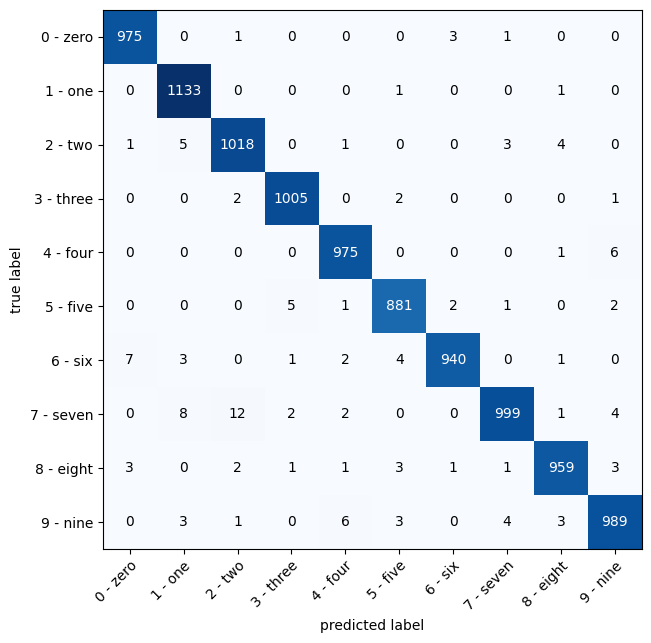

In [ ]:
test_data.targets[:10], y_preds[:10]


from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

comfmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
comfmat_tensor = comfmat(preds=y_preds,
                         target=test_data.targets)

fix, ax = plot_confusion_matrix(
    conf_mat=comfmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [ ]:
A_tensor = torch.rand([1,3,64,64])
A_tensor.shape

conv2_layer = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=2, padding=1, stride=2)

print(f"Random tensor original shape: {A_tensor.shape}")
random_tensor_through_conv_layer = conv2_layer(A_tensor)
print(f"Random tensor through conv layer shape: {random_tensor_through_conv_layer.shape}")


Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 33, 33])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [ ]:
from torchvision import datasets
from torchvision import transforms

train_fmnist_data = datasets.FashionMNIST(root="'",download=True,train=True,transform=transforms.ToTensor())

test_fmnist_data = datasets.FashionMNIST(root="'",download=True,train=False,transform=transforms.ToTensor())

len(train_fmnist_data), len(test_fmnist_data)

(60000, 10000)

In [ ]:
train_fmnist_dataloader = DataLoader(batch_size=32, shuffle=True,dataset=train_fmnist_data)
test_fmnist_dataloader = DataLoader(batch_size=32, shuffle=False,dataset=test_fmnist_data)
len(train_fmnist_dataloader), len(test_fmnist_dataloader)

(1875, 313)

In [ ]:
fmnist_class_names = train_fmnist_data.classes
fmnist_class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
model_FMNIST = MNISTModelV2(hidden_units=10, input_channels=1, output_channels=len(fmnist_class_names)).to(device)
model_FMNIST

MNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
from torch import nn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_FMNIST.parameters(), lr=0.1)

In [ ]:
from tqdm.auto import tqdm
from torchmetrics import Accuracy

# acc_fn = Accuracy(num_classes=len(fmnist_class_names)).to(device)
acc_fn = Accuracy(task="multiclass" ,num_classes=len(fmnist_class_names)).to(device)

epochs = 5

for epoch in tqdm(range(epochs)):
  train_loss, test_loss_total = 0, 0
  train_acc, test_acc = 0, 0

  model_FMNIST.train()

  for batch, (X_train,y_train) in enumerate(train_fmnist_dataloader):
    X_train, y_train = X_train.to(device), y_train.to(device)

    y_pred = model_FMNIST(X_train).to(device)
    loss = loss_fn(y_pred, y_train)

    train_loss += loss
    train_acc = acc_fn(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(train_fmnist_dataloader)
  train_acc /= len(train_fmnist_dataloader)

  model_FMNIST.eval()
  with torch.inference_mode():
    for batch, (X_test,y_test) in enumerate(test_fmnist_dataloader):
      X_test, y_test = X_test.to(device), y_test.to(device)

      y_pred_test = model_FMNIST(X_test)
      loss = loss_fn(y_pred_test, y_test)

      test_loss_total += loss
      test_acc += acc_fn(y_pred_test, y_test)

    test_loss_total /= len(test_fmnist_dataloader)
    test_acc /= len(test_fmnist_dataloader)

  print(f"Epoch: {epoch} | Train loss: {train_loss:.3f} | Train acc: {train_acc:.2f} | Test loss: {test_loss_total:.3f} | Test acc: {test_acc:.2f}")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.717 | Train acc: 0.00 | Test loss: 0.394 | Test acc: 0.86
Epoch: 1 | Train loss: 0.356 | Train acc: 0.00 | Test loss: 0.349 | Test acc: 0.87
Epoch: 2 | Train loss: 0.322 | Train acc: 0.00 | Test loss: 0.340 | Test acc: 0.88
Epoch: 3 | Train loss: 0.300 | Train acc: 0.00 | Test loss: 0.299 | Test acc: 0.89
Epoch: 4 | Train loss: 0.288 | Train acc: 0.00 | Test loss: 0.314 | Test acc: 0.89


In [ ]:
# Make predictions with trained model_2
test_preds = []
model_2.eval()
with torch.inference_mode():
  for X_test, y_test in tqdm(test_fmnist_dataloader):
    y_logits = model_FMNIST(X_test.to(device))
    y_pred_probs = torch.softmax(y_logits, dim=1)
    y_pred_labels = torch.argmax(y_pred_probs, dim=1)
    test_preds.append(y_pred_labels)
test_preds = torch.cat(test_preds).cpu() # matplotlib likes CPU
test_preds[:100], len(test_preds)

  0%|          | 0/313 [00:00<?, ?it/s]

(tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
         5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
         5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
         5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
         5, 5, 5, 5]),
 10000)

In [ ]:
test_preds = []
model_FMNIST.eval()
with torch.inference_mode():
  for (X_test, y_test) in tqdm(test_fmnist_dataloader):
    X_test, y_test = X_test.to(device), y_test.to(device)

    y_logits = model_FMNIST(X_test)
    y_prob = torch.softmax(y_logits, dim=1)
    y_label = torch.argmax(y_prob, dim=1)

    test_preds.append(y_label)
test_preds = torch.cat(test_preds).cpu()

test_preds[:100], len(test_preds)




  0%|          | 0/313 [00:00<?, ?it/s]

(tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
         5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
         5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
         5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
         5, 5, 5, 5]),
 10000)

In [ ]:
import numpy as np
wrong_pred_indexes = np.where(test_preds != test_fmnist_data.targets)[0]
len(wrong_pred_indexes)

9000

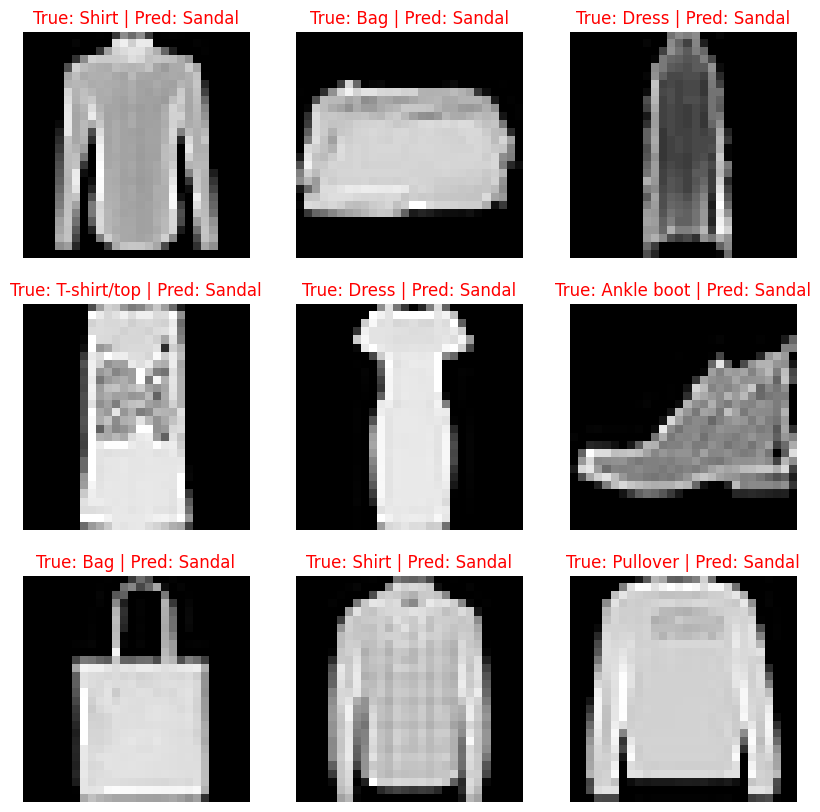

In [ ]:
import random
random_selection = random.sample(list(wrong_pred_indexes), k=9)

plt.figure(figsize=(10,10))
for i, idx in enumerate(random_selection):

  true_label = fmnist_class_names[test_fmnist_data[idx][1]]
  pred_label = fmnist_class_names[test_preds[idx]]

  plt.subplot(3,3,i+1)
  plt.imshow(test_fmnist_data[idx][0].squeeze(), cmap="gray")
  plt.title(f"True: {true_label} | Pred: {pred_label}", c="r")
  plt.axis(False);
